In [1]:
import numpy as np
import pandas as pd
import os
import os.path as op
from functools import lru_cache
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.spatial.distance import squareform
from nilearn.image import load_img, mean_img, math_img, concat_imgs, index_img, new_img_like, resample_img
from nilearn.masking import apply_mask
from nilearn import plotting
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
# %config InlineBackend.figure_format = 'retina'
# matplotlib.rcParams.update({'font.sans-serif': "Helvetica"})
# matplotlib.rcParams.update({'font.serif': "Times"})
%matplotlib inline
# %config InlineBackend.figure_format='retina' 

In [2]:
project_dir = '/Users/ari/GraphLearn'
data_dir = f'{project_dir}/data'
fmriprep_dir = f'{project_dir}/derived/fmriprep'

In [3]:
from roi_loader import Loader
loader = Loader(project_dir)

from graphs import (
    modular,
    ring_lattice,
    graph_df,
    subjects,
    subjects_lattice,
    subjects_modular
)

# Load Results

We have two sets of results:
1. Within-subject, z-scored per run
2. Within-subject, without z-scoring

In each case, we compute the lower bound of the noise ceiling, within each subject.

This measures how well a correct RDM can capture the relationships between runs

In [4]:
results_zscored = {}
for subject in subjects:
    img_zscored = load_img(f'{project_dir}/derived/rsa_consistency/sub-{subject}/sub-{subject}_across-run_lower-bound_zscored.nii.gz')
    results_zscored[subject] = img_zscored

First, let's just look at the raw results here


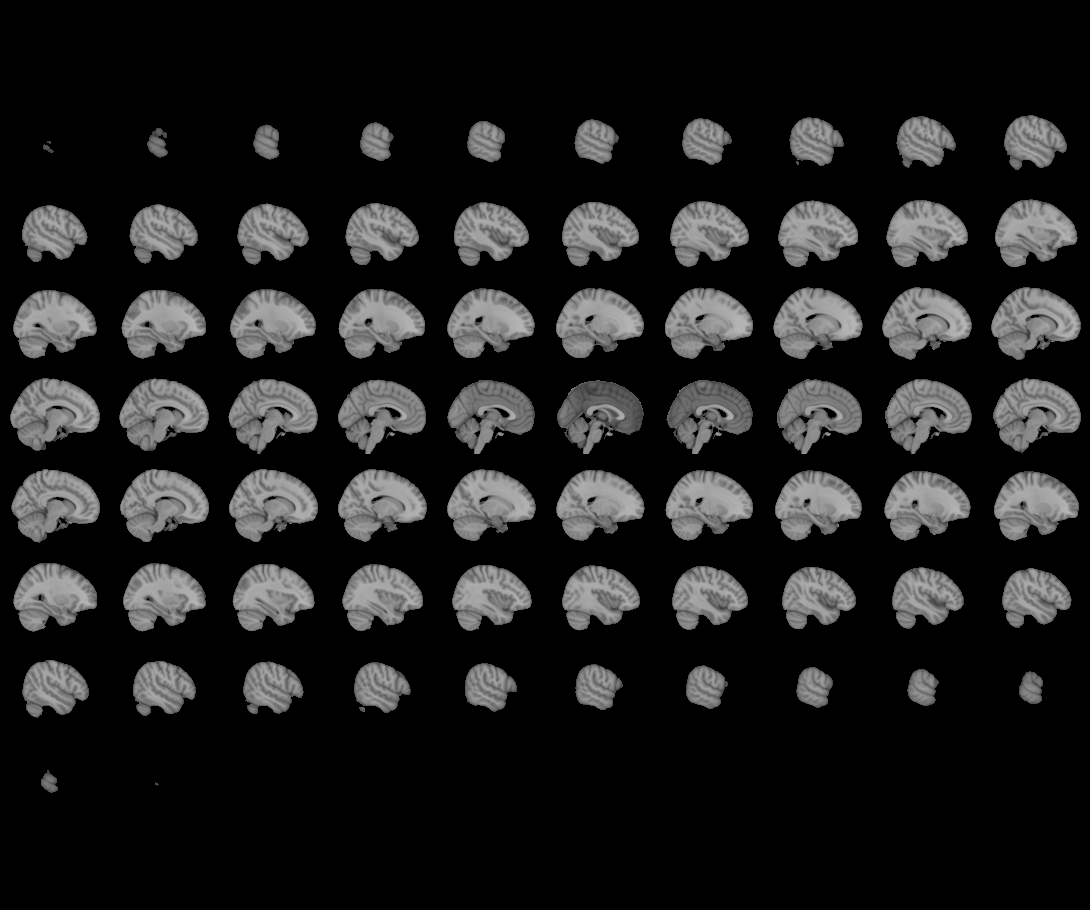
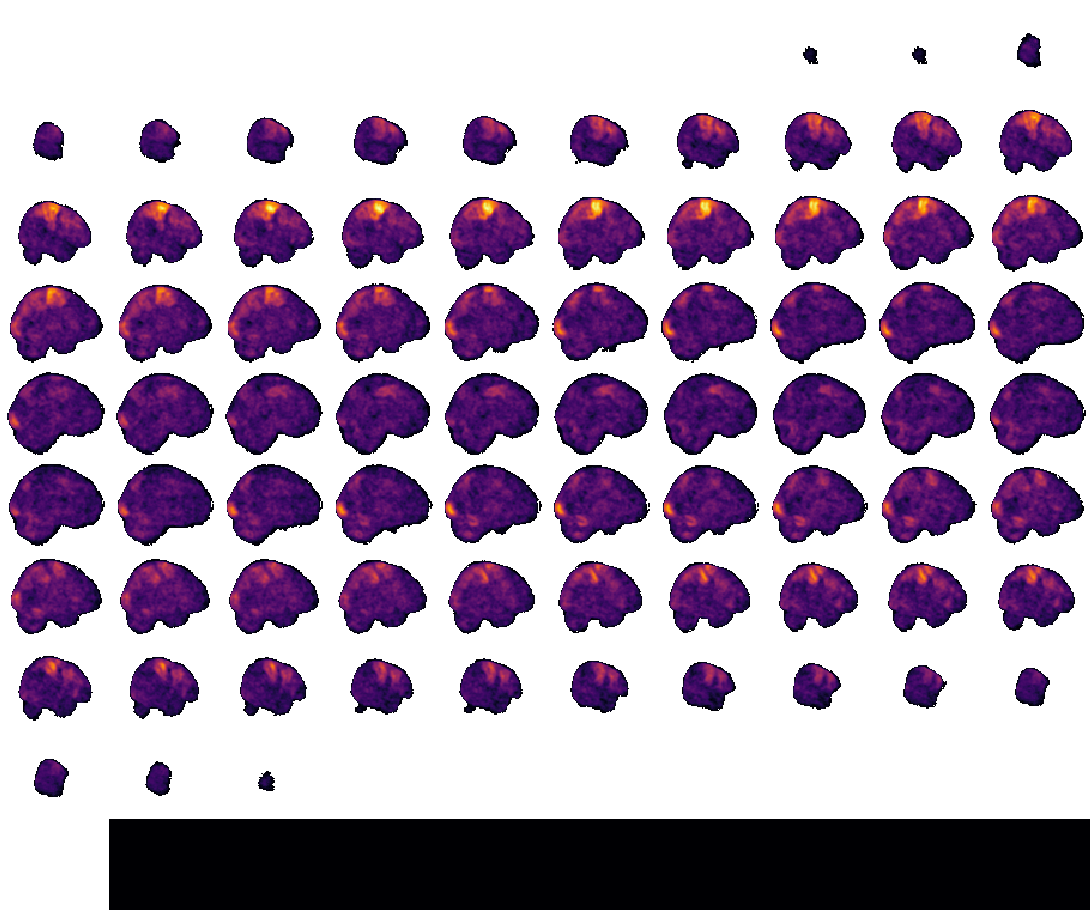

In [5]:
plotting.view_img(math_img('img * (img > 0)', img=mean_img(results_zscored[s] for s in subjects)),
                  resampling_interpolation='nearest',
                  symmetric_cmap=False,
                  cmap='inferno')

In [6]:
within_avg = math_img('img * (img > 0)', img=mean_img(results_zscored[s] for s in subjects))

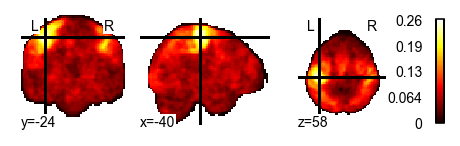

In [7]:
mpl.rcParams.update({'font.family': ['sans-serif'],
                             'font.sans-serif': ['Arial'],
                             "font.size": 7,
                             "axes.titlesize": 7,
                             "axes.labelsize": 7,
                             "xtick.labelsize": 7,
                             "ytick.labelsize": 7,
                             'legend.fontsize': 7,
                             'savefig.dpi': 600,
                             'legend.title_fontsize': 7})
f = plt.figure(figsize=(3, 0.8))
display = plotting.plot_stat_map(within_avg,
                                 cut_coords=(-40, -24, 58),
                                 annotate=False,
#                                  display_mode='tiled',
                                 figure=f)
display.annotate(size=7, font='Arial')
# display.title('Noise Ceiling Lower Bound\nOrdered By Movement\nPearson r', size=7, font='Arial', bgcolor='white', color='black')
f.savefig('images/within-subject-map-motor.pdf')

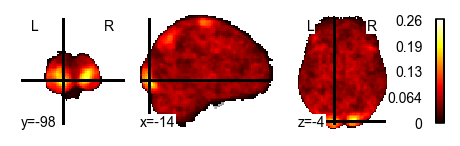

In [8]:
mpl.rcParams.update({'font.family': ['sans-serif'],
                             'font.sans-serif': ['Arial'],
                             "font.size": 7,
                             "axes.titlesize": 7,
                             "axes.labelsize": 7,
                             "xtick.labelsize": 7,
                             "ytick.labelsize": 7,
                             'legend.fontsize': 7,
                             'savefig.dpi': 600,
                             'legend.title_fontsize': 7})
f = plt.figure(figsize=(3, 0.8))
display = plotting.plot_stat_map(within_avg,
                                 cut_coords=(-14, -98, -4),
                                 annotate=False,
#                                  display_mode='tiled',
                                 figure=f)
display.annotate(size=7, font='Arial')
# display.title('Noise Ceiling Lower Bound\nOrdered By Movement\nPearson r', size=7, font='Arial', bgcolor='white', color='black')
f.savefig('images/within-subject-map-visual.pdf')